In [1]:
from constants_and_functions import *

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.offsetbox import AnchoredText

plt.rcParams.update({ 
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
def T2_n3(eta):
    x = np.log10(eta)
    A, B, C, D, E, F = -1.124, 0.877, -13.37, 21.55, -16.48, 4.124
    T2_n3 = 10**(A + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5)
    return T2_n3

def T3_n3(eta):
    x = np.log10(eta)
    A, B, C, D, E, F = -1.703, 2.653, -14.34, 12.85, -0.492, -3.600
    T3_n3 = 10**(A + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5)
    return T3_n3

def T2_n15(eta):
    x = np.log(eta)
    A, B, C, D, E, F = -0.397, 1.678, 1.277, -12.42, 9.446, -5.550
    T2_n15 = np.exp(A + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5)
    return T2_n15

def T3_n15(eta):
    x = np.log(eta)
    A, B, C, D, E, F = -0.909, 1.574, 12.37, -57.40, 80.10, -46.43
    T3_n15 = np.exp(A + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5)
    return T3_n15

def DEtidal_n3(MBH, mstar, rstar, rp):
    eta = np.sqrt(mstar / (mstar + MBH)) * (rp / rstar)**(3/2)
    factor = G_grav * mstar**2 / rstar * (MBH / mstar)**2
    DEtidal_n3 = factor * ((rstar/rp)**6*T2_n3(eta) + (rstar/rp)**8*T3_n3(eta))
    return DEtidal_n3

def DEtidal_n15(MBH, mstar, rstar, rp):
    eta = np.sqrt(mstar / (mstar + MBH)) * (rp / rstar)**(3/2)
    factor = G_grav * mstar**2 / rstar * (MBH / mstar)**2
    DEtidal_n15 = factor * ((rstar/rp)**6*T2_n15(eta) + (rstar/rp)**8*T3_n15(eta))
    return DEtidal_n15

def rTidal_n3(MBH, mstar, rstar):
    eta_n3 = 0.844
    rTidal_n3 = eta_n3**(2/3) * rstar * (MBH / mstar)**(1/3)
    return rTidal_n3

def rTidal_n15(MBH, mstar, rstar):
    eta_n15 = 1.839
    rTidal_n15 = eta_n15**(2/3) * rstar * (MBH / mstar)**(1/3)
    return rTidal_n15

def Trel_infty(MBH, mstar, vrel):
    Trel_infty = 0.5 * MBH * mstar / (MBH + mstar) * vrel**2
    return Trel_infty

In [3]:
mstar = 1.0
rstar = 2.26e-8

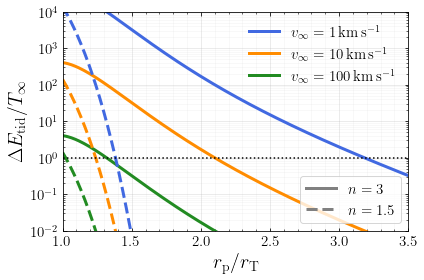

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

c1, c2, c3 = 'royalblue', 'darkorange', 'forestgreen'

MBH = 1000.0

lw = 3

vrel = 1.0
rT = rTidal_n3(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n3(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c1, lw=lw)

vrel = 10.0
rT = rTidal_n3(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n3(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c2, lw=lw)

vrel = 100.0
rT = rTidal_n3(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n3(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c3, lw=lw)



vrel = 1.0
rT = rTidal_n15(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n15(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c1, ls='dashed', lw=lw)

vrel = 10.0
rT = rTidal_n15(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n15(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c2, ls='dashed', lw=lw)

vrel = 100.0
rT = rTidal_n15(MBH, mstar, rstar)
rp = np.linspace(rT, 10*rT, 10**3)
plt.plot(rp/rT, DEtidal_n15(MBH, mstar, rstar, rp) / Trel_infty(MBH, mstar, vrel), c=c3, ls='dashed', lw=lw)

plt.semilogy()

plt.axhline(y=1, color='k', linestyle='dotted')

plt.tick_params(which='both', direction='in', top=True, right=True, labelsize=15)

plt.xlabel('$r_{\\rm p}/r_{\\rm T}$', size=20)
plt.ylabel('$\\Delta E_{\\rm tid}/T_\infty$', size=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.grid(which='major', alpha=0.3)
plt.grid(which='minor', alpha=0.1)


x = np.linspace(100, 200)
l1, = plt.plot(x, x, color=c1, lw=lw, label='$v_{\\infty}=1\,\\rm km\, s^{-1}$')
l2, = plt.plot(x, x, color=c2, lw=lw, label='$v_{\\infty}=10\,\\rm km\, s^{-1}$')
l3, = plt.plot(x, x, color=c3, lw=lw, label='$v_{\\infty}=100\,\\rm km\, s^{-1}$')
l4, = plt.plot(x, x, color='grey', lw=3, linestyle='solid', label='$n=3$')
l5, = plt.plot(x, x, color='grey', lw=3, linestyle='dashed', label='$n=1.5$')

legend1 = plt.legend(handles=[l1, l2, l3], loc='upper right', fontsize=15, frameon=False)
plt.gca().add_artist(legend1)
plt.legend(handles=[l4, l5], loc='lower right', fontsize=15, frameon=True)

plt.xlim(1.0, 3.5)
plt.ylim(1e-2, 1e4)

plt.tight_layout()

plt.savefig('dEt_rp.pdf')